In [5]:
import pandas as pd # standard
import numpy as np # standard
from sklearn import tree # package to make decision tree
from sklearn.metrics import accuracy_score # for accuracy calculation
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("/Users/avery/OneDrive/Documents/GitHub/Clinical_TLB_2023-2024/lung_cancer_tlb.xlsx")

# replace NA with control
df['CancerType'] = np.where(df['CancerType'].isna(), 'Control', df['CancerType'])

# keep only Control and Adenocarcinoma for analysis
df_tree = df[(df['CancerType'] == 'Control') | (df['CancerType'] == 'Adenocarcinoma')]
df_tree = df_tree.reset_index(drop=True)

Bootstrap Cross-Validation

In [3]:
# length of df
num_rows = df_tree.shape[0]

# number of bootstraps
total_bootstraps = 500

# create results df
performance_metrics = pd.DataFrame(columns=['Weighted Accuracy', 'AUC'])

# create array of all indices in full data set
all_indices = np.arange(num_rows)

# columns to drop
drop_cols = ['sample_id', 'pub_id', 'CancerType']

# loop to bootstrap and validate many times
for i in range(total_bootstraps):

    # sample indices with replacement of df
    train_indices = np.random.choice(num_rows, num_rows, replace = True)

    # get the train set using the indices
    train_set = df_tree.iloc[train_indices, : ]

    # get the indices not selected
    test_indices = np.setdiff1d(all_indices, train_indices)

    # use not selected indices as the train set
    test_set = df_tree.iloc[test_indices, : ]
    
    # train decision tree
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit( train_set.drop(drop_cols, axis = 1), train_set['CancerType'])

    # get probabilities
    test_probabilities = clf.predict_proba(test_set.drop(drop_cols, axis = 1))

    # test decision tree
    test_predictions = clf.predict(test_set.drop(drop_cols, axis = 1))

    # calculate weighted accuracy
    balanced_acc = balanced_accuracy_score(test_set['CancerType'], test_predictions)

    # calculate AUC
    auc = roc_auc_score(test_set['CancerType'] == 'Control', test_probabilities[:, 1])

    # append accuracy, auc to results df
    performance_metrics.loc[len(performance_metrics)] = [balanced_acc, auc]





To Do: 
Store feature importance,
Explore hyperparameters

Figure out how to ensure auc calculation is correct, rn the balanced acc and and auc are the same.

In [4]:
clf.classes_
test_set['CancerType'] == 'Control'
test_probabilities[:, 1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.])

(array([ 24., 109., 209., 138.,  20.]),
 array([0.37037037, 0.45467068, 0.53897099, 0.6232713 , 0.70757161,
        0.79187192]),
 <BarContainer object of 5 artists>)

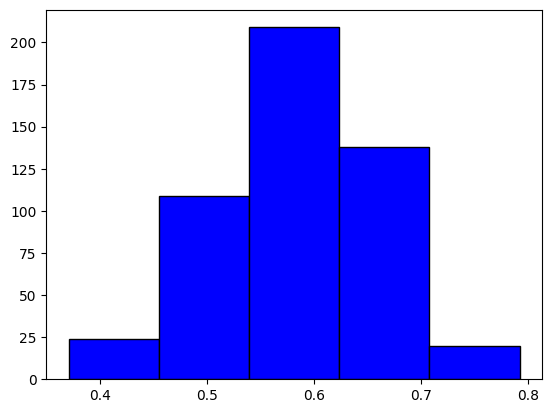

In [7]:
plt.hist(performance_metrics['Weighted Accuracy'], bins=5, color='blue', edgecolor='black')